In [192]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
from scipy.stats import skewnorm
from scipy.optimize import minimize

mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'

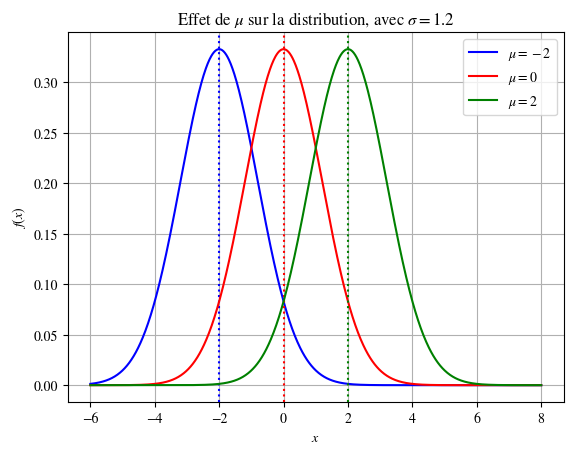

In [193]:
x = np.linspace(-6, 8, 1000)
sigma = 1.2
mus = [-2, 0, 2]
colors = ["blue","red","green"]

for mu,colo in zip(mus,colors):
    y = norm.pdf(x, mu, sigma)
    plt.plot(x, y, label=rf"$\mu={mu}$",color=colo)
    plt.axvline(mu, linestyle=":",color=colo)

plt.title("Effet de $\mu$ sur la distribution, avec $\sigma=1.2$")
plt.xlabel(r"$x$")
plt.ylabel(r"$f(x)$")
plt.legend()
plt.grid(True)
plt.savefig("effet_moyenne.jpeg", format='jpeg', dpi=300, bbox_inches='tight')
plt.show()

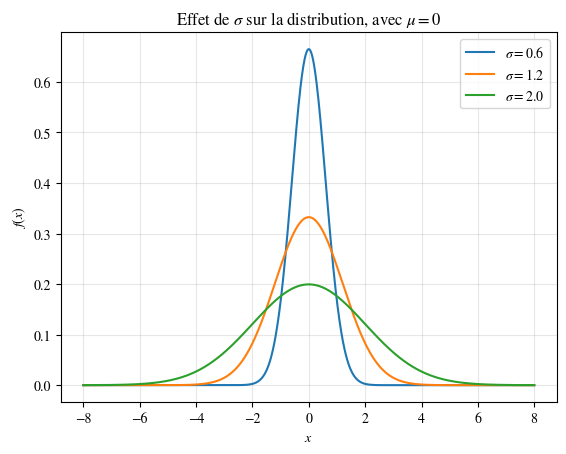

In [194]:
x = np.linspace(-8, 8, 1000)
mu = 0
sigmas = [0.6, 1.2, 2.0]

for sigma in sigmas:
    y = norm.pdf(x, mu, sigma)
    plt.plot(x, y, label=rf"$\sigma={sigma}$")

plt.title(r"Effet de $\sigma$ sur la distribution, avec $\mu=0$")
plt.xlabel(r"$x$")
plt.ylabel(r"$f(x)$")
plt.legend()
plt.grid(alpha=0.3)
plt.savefig("effet_variance.jpeg", format='jpeg', dpi=300, bbox_inches='tight')
plt.show()

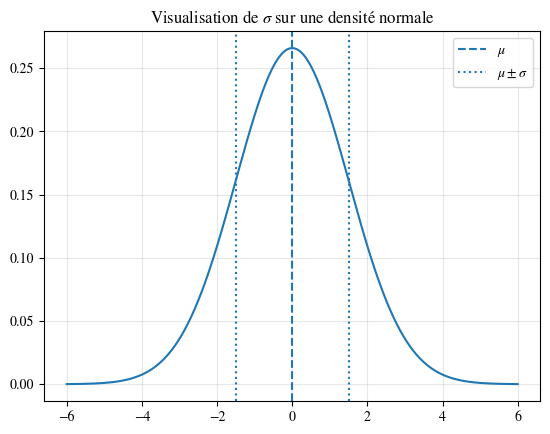

In [195]:
mu = 0
sigma = 1.5

x = np.linspace(-6, 6, 1000)
y = norm.pdf(x, mu, sigma)

plt.plot(x, y)

# moyenne
plt.axvline(mu, linestyle="--", label=r"$\mu$")

# mu ± sigma
plt.axvline(mu+sigma, linestyle=":", label=r"$\mu\pm\sigma$")
plt.axvline(mu-sigma, linestyle=":")

plt.title("Visualisation de $\sigma$ sur une densité normale")
plt.legend()
plt.grid(True)
plt.grid(alpha=0.3)
plt.show()

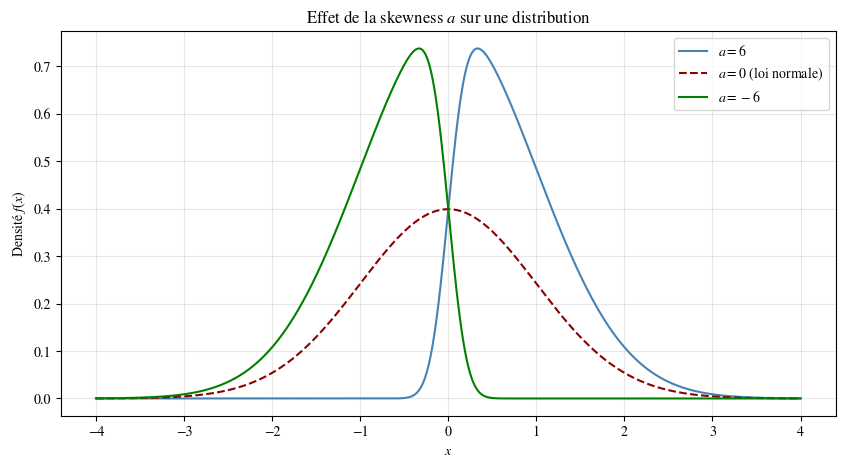

In [196]:
x = np.linspace(-4, 4, 1000)

# Paramètres
mu = 0
sigma = 1

# Distributions
normal = norm.pdf(x, mu, sigma)
skew_positive = skewnorm.pdf(x, a=6, loc=mu, scale=sigma)
skew_negative = skewnorm.pdf(x, a=-6, loc=mu, scale=sigma)

# Tracé
plt.figure(figsize=(10, 5))
plt.plot(x, skew_positive, color="steelblue", label="$a=6$")
plt.plot(x, normal, color="darkred", linestyle="--", label="$a=0$ (loi normale)")
plt.plot(x, skew_negative, color="green", label="$a=-6$")
plt.xlabel("$x$")
plt.ylabel("Densité $f(x)$")
plt.title("Effet de la skewness $a$ sur une distribution")
plt.legend()
plt.grid(alpha=0.3)
plt.savefig("effet_skewness.jpeg", format='jpeg', dpi=300, bbox_inches='tight')
plt.show()

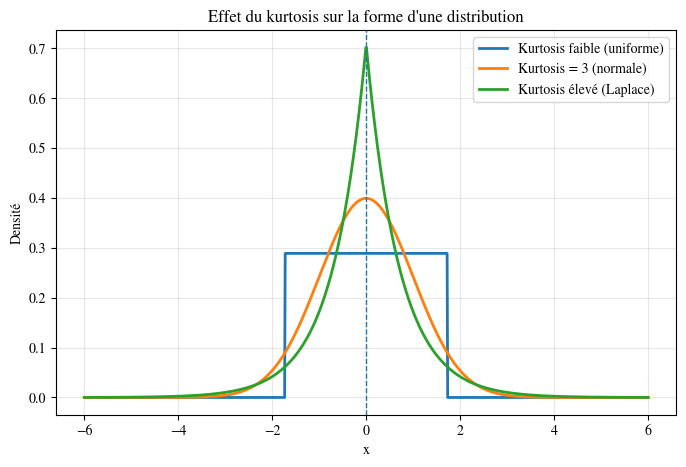

In [197]:
x = np.linspace(-6, 6, 1000)

# 1) Kurtosis faible : loi uniforme (variance = 1)
a = np.sqrt(3)
pdf_uniform = np.where(np.abs(x) <= a, 1 / (2 * a), 0)

# 2) Kurtosis benchmark : loi normale N(0,1)
pdf_normal = (1 / np.sqrt(2 * np.pi)) * np.exp(-x**2 / 2)

# 3) Kurtosis élevé : loi de Laplace (variance = 1)
b = 1 / np.sqrt(2)
pdf_laplace = (1 / (2 * b)) * np.exp(-np.abs(x) / b)

plt.figure(figsize=(8, 5))
plt.plot(x, pdf_uniform, linewidth=2, label="Kurtosis faible (uniforme)")
plt.plot(x, pdf_normal, linewidth=2, label="Kurtosis = 3 (normale)")
plt.plot(x, pdf_laplace, linewidth=2, label="Kurtosis élevé (Laplace)")
plt.axvline(0, linestyle="--", linewidth=1)
plt.legend()
plt.title("Effet du kurtosis sur la forme d'une distribution")
plt.xlabel("x")
plt.ylabel("Densité")
plt.grid(alpha=0.3)
plt.show()

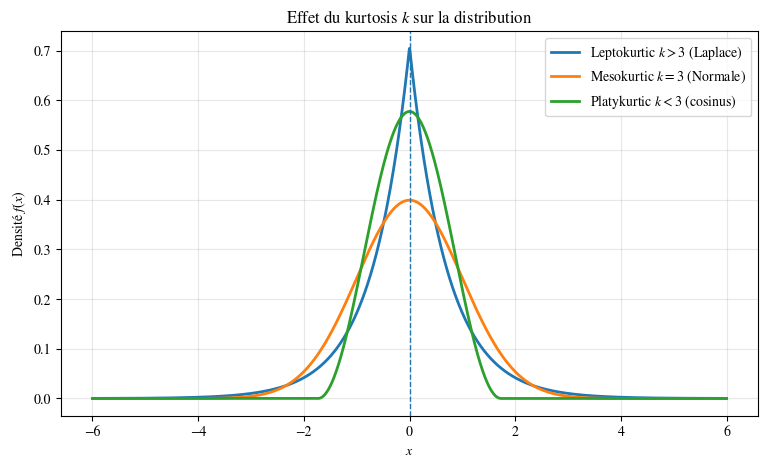

In [198]:
x = np.linspace(-6, 6, 2000)

# --- Mesokurtic : loi normale ---
pdf_normal = (1 / np.sqrt(2 * np.pi)) * np.exp(-x**2 / 2)

# --- Leptokurtic : loi de Laplace (variance = 1) ---
b = 1 / np.sqrt(2)
pdf_laplace = (1 / (2 * b)) * np.exp(-np.abs(x) / b)

# --- Platykurtic lisse : loi cosinus (variance = 1) ---
a = np.sqrt(3)              # normalisation de la variance
pdf_cosine = np.zeros_like(x)
mask = np.abs(x) <= a
pdf_cosine[mask] = (1 / (2 * a)) * (1 + np.cos(np.pi * x[mask] / a))

plt.figure(figsize=(9, 5))
plt.plot(x, pdf_laplace, linewidth=2, label="Leptokurtic $k>3$ (Laplace)")
plt.plot(x, pdf_normal,  linewidth=2, label="Mesokurtic $k=3$ (Normale)")
plt.plot(x, pdf_cosine,  linewidth=2, label="Platykurtic $k<3$ (cosinus)")
plt.axvline(0, linestyle="--", linewidth=1)
plt.legend()
plt.title("Effet du kurtosis $k$ sur la distribution")
plt.xlabel("$x$")
plt.ylabel("Densité $f(x)$")
plt.grid(alpha=0.3)
plt.savefig("effet_kurtosis.jpeg", format='jpeg', dpi=300, bbox_inches='tight')
plt.show()

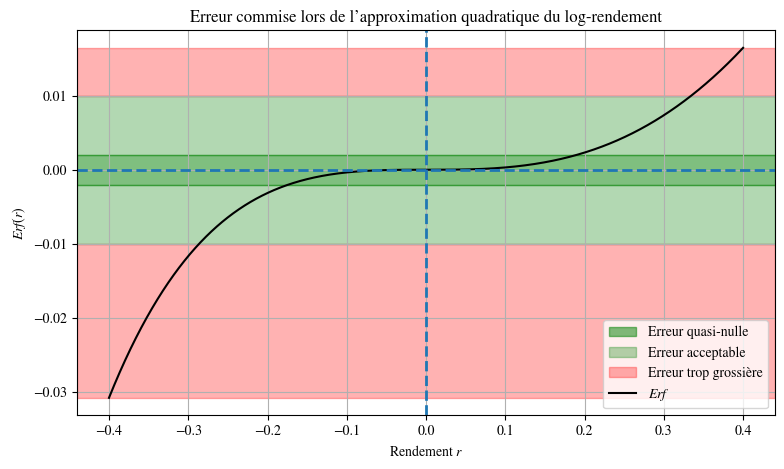

In [199]:
r = np.linspace(-0.4, 0.4, 2000)
error = np.log(1 + r) - (r - 0.5 * r**2)
eps_quasi_nul = 0.002   
eps_accept = 0.01        

plt.figure(figsize=(9, 5))

# Zones définies en valeur absolue
plt.axhspan(-eps_quasi_nul, eps_quasi_nul,color='green',alpha=0.5, label="Erreur quasi-nulle")
plt.axhspan(eps_quasi_nul, eps_accept,color='green',alpha=0.3, label="Erreur acceptable")
plt.axhspan(-eps_accept, -eps_quasi_nul,color='green',alpha=0.3)
plt.axhspan(eps_accept, np.max(error),color='red',alpha=0.3, label="Erreur trop grossière")
plt.axhspan(np.min(error), -eps_accept,color='red',alpha=0.3)
plt.plot(r, error, linewidth=1.5, color="black",label="$Erf$")

plt.axhline(0, linestyle="--", linewidth=2)
plt.axvline(0, linestyle="--", linewidth=2)
plt.xlabel(r"Rendement $r$")
plt.ylabel("$Erf(r)$")
plt.title("Erreur commise lors de l’approximation quadratique du log-rendement")
plt.legend()
plt.grid(True)
plt.savefig("effet_rendement_erreur.jpeg", format='jpeg', dpi=300, bbox_inches='tight')
plt.show()

In [200]:
# =====================================================
# 1. Définition des actifs
# =====================================================

assets = [
    "Actions US",
    "Actions EU",
    "Obligations",
    "Immobilier",
    "Matières premières"
]

# =====================================================
# 2. Paramètres du portefeuille
# =====================================================
w = np.array([0.35, 0.20, 0.25, 0.10, 0.10])
mu = np.array([0.08, 0.07, 0.03, 0.05, 0.06])
sigma = np.array([0.18, 0.16, 0.06, 0.12, 0.20])

# Matrice de corrélation (hypothétique mais réaliste)
R = np.array([
    [1.00,  0.75, -0.20,  0.40,  0.30],
    [0.75,  1.00, -0.15,  0.35,  0.25],
    [-0.20, -0.15,  1.00,  0.10, -0.05],
    [0.40,  0.35,  0.10,  1.00,  0.20],
    [0.30,  0.25, -0.05,  0.20,  1.00]
])

# =====================================================
# 3. Matrice de covariance
# =====================================================

D = np.diag(sigma)           # matrice diagonale des volatilités
Sigma = D @ R @ D            # matrice de covariance

# =====================================================
# 4. Rendement et risque du portefeuille
# =====================================================
portfolio_return = w @ mu
portfolio_variance = w @ Sigma @ w
portfolio_volatility = np.sqrt(portfolio_variance)

# =====================================================
# 5. Mise en forme des résultats
# =====================================================
df_assets = pd.DataFrame(
    {
        "Poids": w,
        "Rendement espéré": mu,
        "Volatilité": sigma
    },
    index=assets
)

df_cov = pd.DataFrame(Sigma, index=assets, columns=assets)
df_corr = pd.DataFrame(R, index=assets, columns=assets)

# =====================================================
# 6. Affichage
# =====================================================

print("=== Actifs du portefeuille ===")
print(df_assets)

print("\n=== Matrice de corrélation ===")
print(df_corr)

print("\n=== Matrice de covariance ===")
print(df_cov)

print("\n=== Portefeuille ===")
print("Poids :", w.round(3))
print(f"Rendement espéré : {portfolio_return:.2%}")
print(f"Volatilité       : {portfolio_volatility:.2%}")

=== Actifs du portefeuille ===
                    Poids  Rendement espéré  Volatilité
Actions US           0.35              0.08        0.18
Actions EU           0.20              0.07        0.16
Obligations          0.25              0.03        0.06
Immobilier           0.10              0.05        0.12
Matières premières   0.10              0.06        0.20

=== Matrice de corrélation ===
                    Actions US  Actions EU  Obligations  Immobilier  \
Actions US                1.00        0.75        -0.20        0.40   
Actions EU                0.75        1.00        -0.15        0.35   
Obligations              -0.20       -0.15         1.00        0.10   
Immobilier                0.40        0.35         0.10        1.00   
Matières premières        0.30        0.25        -0.05        0.20   

                    Matières premières  
Actions US                        0.30  
Actions EU                        0.25  
Obligations                      -0.05  
Immobilier

In [201]:
# =====================================================
# 1. Données du portefeuille (5 actifs)
# =====================================================
assets = [
    "Actions US",
    "Actions EU",
    "Obligations",
    "Immobilier",
    "Matières premières"
]

mu = np.array([0.08, 0.07, 0.03, 0.05, 0.06])
sigma = np.array([0.18, 0.16, 0.06, 0.12, 0.20])
R = np.array([
    [1.00,  0.75, -0.20,  0.40,  0.30],
    [0.75,  1.00, -0.15,  0.35,  0.25],
    [-0.20, -0.15,  1.00,  0.10, -0.05],
    [0.40,  0.35,  0.10,  1.00,  0.20],
    [0.30,  0.25, -0.05,  0.20,  1.00]
])

Sigma = np.diag(sigma) @ R @ np.diag(sigma)

# =====================================================
# 2. Fonctions rendement / risque
# =====================================================
def portfolio_return(w):
    return w @ mu
def portfolio_volatility(w):
    return np.sqrt(w @ Sigma @ w)

# =====================================================
# 3. APPROCHE 1 — Diversification passive
#    (poids inversement proportionnels à la volatilité)
# =====================================================
w_div = 1 / sigma
w_div = w_div / np.sum(w_div)

# =====================================================
# 4. APPROCHE 2 — Optimisation active
#    (portefeuille de variance minimale)
# =====================================================
n = len(mu)
w0 = np.ones(n) / n
constraints = {"type": "eq", "fun": lambda w: np.sum(w) - 1}
bounds = [(0, 1) for _ in range(n)]
res = minimize(
    lambda w: w @ Sigma @ w,
    w0,
    method="SLSQP",
    bounds=bounds,
    constraints=constraints
)
w_opt = res.x

# =====================================================
# 5. Résultats
# =====================================================
print("=== Diversification ===")
print("Poids :", w_div.round(3))
print("Rendement :", portfolio_return(w_div).round(4))
print("Volatilité :", portfolio_volatility(w_div).round(4))

print("\n=== Optimisation (minimise variance) ===")
print("Poids :", w_opt.round(3))
print("Rendement :", portfolio_return(w_opt).round(4))
print("Volatilité :", portfolio_volatility(w_opt).round(4))

=== Diversification ===
Poids : [0.133 0.15  0.399 0.199 0.12 ]
Rendement : 0.0502
Volatilité : 0.0714

=== Optimisation (minimise variance) ===
Poids : [0.077 0.037 0.774 0.07  0.043]
Rendement : 0.038
Volatilité : 0.051


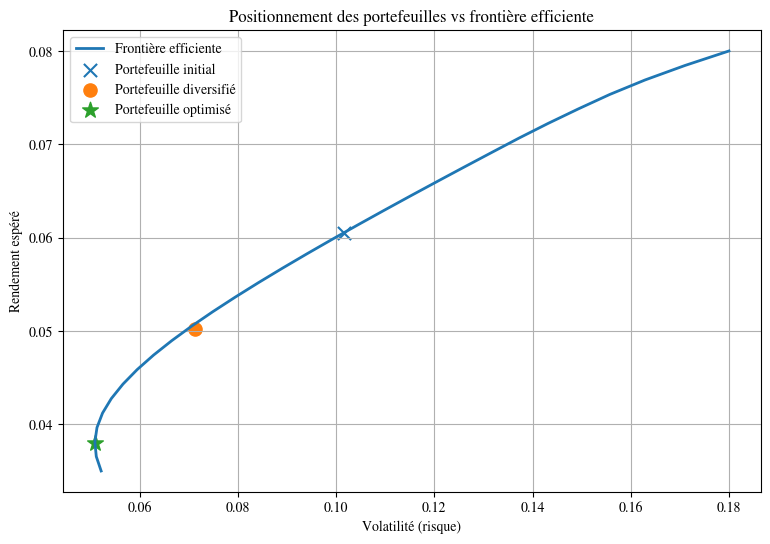

In [227]:
mu = np.array([0.08, 0.07, 0.03, 0.05, 0.06])
sigma = np.array([0.18, 0.16, 0.06, 0.12, 0.20])
R = np.array([
    [1.00,  0.75, -0.20,  0.40,  0.30],
    [0.75,  1.00, -0.15,  0.35,  0.25],
    [-0.20, -0.15,  1.00,  0.10, -0.05],
    [0.40,  0.35,  0.10,  1.00,  0.20],
    [0.30,  0.25, -0.05,  0.20,  1.00]
])
Sigma = np.diag(sigma) @ R @ np.diag(sigma)
n = len(mu)

# =====================================================
# Fonctions rendement / risque
# =====================================================
def port_return(w):
    return w @ mu
def port_vol(w):
    return np.sqrt(w @ Sigma @ w)

# =====================================================
# Portefeuilles
# =====================================================

# 1. Portefeuille initial
w_init = np.array([0.35, 0.20, 0.25, 0.10, 0.10])

# 2. Portefeuille diversifié passif (1 / volatilité)
w_div = 1 / sigma
w_div = w_div / np.sum(w_div)

# 3. Portefeuille optimisé (variance minimale)
w0 = np.ones(n) / n
constraints = {"type": "eq", "fun": lambda w: np.sum(w) - 1}
bounds = [(0, 1) for _ in range(n)]
res_min = minimize(
    lambda w: w @ Sigma @ w,
    w0,
    method="SLSQP",
    bounds=bounds,
    constraints=constraints
)
w_opt = res_min.x

# =====================================================
# Frontière efficiente
# =====================================================
target_returns = np.linspace(0.035, 0.08, 30)
vols, rets = [], []
for r_target in target_returns:
    cons = [
        constraints,
        {"type": "eq", "fun": lambda w, r=r_target: port_return(w) - r}
    ]
    res = minimize(
        lambda w: w @ Sigma @ w,
        w0,
        method="SLSQP",
        bounds=bounds,
        constraints=cons
    )
    if res.success:
        vols.append(np.sqrt(res.fun))
        rets.append(r_target)
vols = np.array(vols)
rets = np.array(rets)

ret_init, vol_init = port_return(w_init), port_vol(w_init)
ret_div,  vol_div  = port_return(w_div),  port_vol(w_div)
ret_opt,  vol_opt  = port_return(w_opt),  port_vol(w_opt)

plt.figure(figsize=(9, 6))
plt.plot(vols, rets, label="Frontière efficiente", linewidth=2)
plt.scatter(vol_init, ret_init, marker="x", s=90, label="Portefeuille initial")
plt.scatter(vol_div, ret_div, marker="o", s=90, label="Portefeuille diversifié")
plt.scatter(vol_opt, ret_opt, marker="*", s=140, label="Portefeuille optimisé")
plt.xlabel("Volatilité (risque)")
plt.ylabel("Rendement espéré")
plt.title("Positionnement des portefeuilles vs frontière efficiente")
plt.legend()
plt.savefig("frontiere_efficiente.jpeg", format='jpeg', dpi=300, bbox_inches='tight')
plt.grid(True)

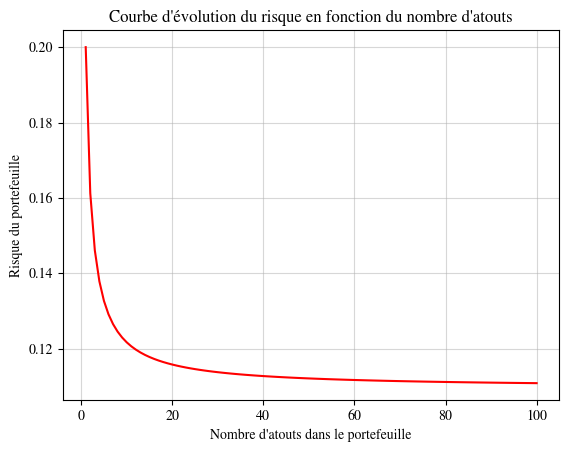

In [203]:
sigma = 0.20     
rho = 0.30      
n_assets = np.arange(1, 101)
variance = sigma**2 * (1/n_assets + rho * (1 - 1/n_assets))
volatility = np.sqrt(variance)

plt.plot(n_assets, volatility,color='red',linewidth=1.5)
plt.title("Courbe d'évolution du risque en fonction du nombre d'atouts")
plt.ylabel("Risque du portefeuille")
plt.xlabel("Nombre d'atouts dans le portefeuille")
plt.grid(True,alpha=0.5)
plt.savefig("risque_nombre_atouts.jpeg", format='jpeg', dpi=300, bbox_inches='tight')